<a href="https://colab.research.google.com/github/choiws777/test/blob/master/CNA6_day4_1_automl_WS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret   #설치 후 재시작 필요!

     |████████████████████████████████| 288 kB 7.3 MB/s 
     |████████████████████████████████| 113 kB 74.1 MB/s 
     |████████████████████████████████| 86 kB 8.2 MB/s 
     |████████████████████████████████| 1.7 MB 57.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 54.0 MB/s 
     |████████████████████████████████| 2.0 MB 72.6 MB/s 
     |████████████████████████████████| 261 kB 68.5 MB/s 
     |████████████████████████████████| 167 kB 53.7 MB/s 
     |████████████████████████████████| 1.3 MB 71.9 MB/s 
     |████████████████████████████████| 15.5 MB 76.3 MB/s 
     |████████████████████████████████| 56 kB 6.9 MB/s 
     |████████████████████████████████| 3.1 MB 70.4 MB/s 
     |████████████████████████████████| 10.1 MB 28.7 MB/s 
     |████████████████████████████████| 303 kB 64.0 MB/s 
     |████████████████

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Load Data  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/car_insurance/train.csv")
train.head()

id  Gender   Age  ...  Policy_Sales_Channel  Vintage  Response
0   1  Female  28.0  ...                 152.0       61         0
1   2    Male  39.0  ...                 124.0      158         1
2   3  Female  25.0  ...                 160.0      220         0
3   4    Male  28.0  ...                 152.0       12         0
4   5    Male  66.0  ...                  26.0       80         0

[5 rows x 12 columns]

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/car_insurance/test.csv")
test.head()

id  Gender   Age  ...  Annual_Premium  Policy_Sales_Channel  Vintage
0  285832  Female  36.0  ...         42009.0                 124.0      134
1  285833    Male  56.0  ...         27480.0                 124.0      218
2  285834  Female  22.0  ...         27009.0                 152.0      292
3  285835  Female  34.0  ...         48056.0                  26.0      241
4  285836    Male  47.0  ...          2630.0                 124.0      288

[5 rows x 11 columns]

# Pandas Profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, title="Pandas Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# pycaret

In [ ]:
train.head()

id  Gender   Age  ...  Policy_Sales_Channel  Vintage  Response
0   1  Female  28.0  ...                 152.0       61         0
1   2    Male  39.0  ...                 124.0      158         1
2   3  Female  25.0  ...                 160.0      220         0
3   4    Male  28.0  ...                 152.0       12         0
4   5    Male  66.0  ...                  26.0       80         0

[5 rows x 12 columns]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    285831 non-null  int64  
 1   Gender                285831 non-null  object 
 2   Age                   283633 non-null  float64
 3   Driving_License       285831 non-null  int64  
 4   Region_Code           284825 non-null  float64
 5   Previously_Insured    285831 non-null  int64  
 6   Vehicle_Age           285831 non-null  object 
 7   Vehicle_Damage        285831 non-null  object 
 8   Annual_Premium        285772 non-null  float64
 9   Policy_Sales_Channel  285831 non-null  float64
 10  Vintage               285831 non-null  int64  
 11  Response              285831 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 26.2+ MB


In [ ]:
# Setup   #범주형 또는 수치형 변수 확인하고 따로 변경해줘야함
from pycaret.classification import *
setup_cls = setup(data=train, categorical_features=['Gender', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel'], target='Response')

Description             Value
0                               session_id              2840
1                                   Target          Response
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data      (285831, 12)
5                           Missing Values              True
6                         Numeric Features                 4
7                     Categorical Features                 7
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set     (200081, 212)
12                    Transformed Test Set      (85750, 212)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              cc07
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
# Setup
from pycaret.classification import *
setup_cls = setup(data=train,  target='Survived')

In [ ]:
# model 비교
top5 = compare_models(n_select=5, fold=5)

Model  Accuracy     AUC  Recall   Prec.  \
ridge                    Ridge Classifier    0.8778  0.0000  0.0000  0.0000   
gbc          Gradient Boosting Classifier    0.8778  0.8554  0.0003  0.3000   
dummy                    Dummy Classifier    0.8778  0.5000  0.0000  0.0000   
lightgbm  Light Gradient Boosting Machine    0.8777  0.8559  0.0047  0.4700   
ada                  Ada Boost Classifier    0.8776  0.8528  0.0038  0.4451   
lr                    Logistic Regression    0.8773  0.8311  0.0025  0.2685   
lda          Linear Discriminant Analysis    0.8762  0.8453  0.0114  0.3165   
rf               Random Forest Classifier    0.8647  0.8315  0.1354  0.3582   
knn                K Neighbors Classifier    0.8613  0.5801  0.0446  0.1995   
et                 Extra Trees Classifier    0.8561  0.8199  0.1731  0.3307   
dt               Decision Tree Classifier    0.8255  0.5989  0.2988  0.2913   
nb                            Naive Bayes    0.7635  0.8146  0.6594  0.2925   
svm                   SVM - Linear Kernel    0.7320  0.0000  0.1964  0.0248   
qda       Quadratic Discriminant Analysis    0.6159  0.4870  0.3163  0.1386   

              F1   Kappa     MCC  TT (Sec)  
ridge     0.0000  0.0000  0.0000     0.640  
gbc       0.0006  0.0004  0.0064    59.298  
dummy     0.0000  0.0000  0.0000     0.236  
lightgbm  0.0094  0.0070  0.0370     2.292  
ada       0.0074  0.0053  0.0304    13.762  
lr        0.0049  0.0027  0.0152     5.082  
lda       0.0219  0.0136  0.0393     9.254  
rf        0.1965  0.1387  0.1585    41.422  
knn       0.0729  0.0295  0.0395    17.564  
et        0.2272  0.1564  0.1664    60.234  
dt        0.2950  0.1954  0.1954     4.534  
nb        0.4053  0.2841  0.3206     0.650  
svm       0.0440  0.0008  0.0057    24.688  
qda       0.1480  0.0017 -0.0058     7.048

In [ ]:
top5

In [ ]:
rf = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8774  0.8511  0.0033  0.3478  0.0065  0.0042  0.0234
1       0.8782  0.8519  0.0049  0.7500  0.0098  0.0082  0.0542
2       0.8776  0.8560  0.0049  0.4444  0.0097  0.0071  0.0362
3       0.8762  0.8613  0.0033  0.1667  0.0064  0.0017  0.0067
4       0.8779  0.8522  0.0029  0.5833  0.0057  0.0045  0.0345
5       0.8777  0.8578  0.0037  0.4500  0.0073  0.0053  0.0317
6       0.8775  0.8546  0.0041  0.4000  0.0081  0.0056  0.0300
7       0.8780  0.8545  0.0065  0.5714  0.0129  0.0102  0.0513
8       0.8773  0.8584  0.0025  0.2727  0.0049  0.0027  0.0152
9       0.8777  0.8644  0.0033  0.5000  0.0065  0.0049  0.0326
Mean    0.8776  0.8562  0.0039  0.4486  0.0078  0.0054  0.0316
SD      0.0005  0.0041  0.0012  0.1580  0.0023  0.0024  0.0138

In [ ]:
lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=2840, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
model = tune_model(lda)

In [ ]:
model = create_model('lightgbm')

KeyboardInterrupt: ignored

### 모델 추론 및 제출파일 작성

In [ ]:
preds = predict_model(rf, test.iloc[:, 1:])
preds

Gender   Age  Driving_License  ...  Vintage  Label   Score
0      Female  36.0                1  ...      134      0  0.6280
1        Male  56.0                1  ...      218      0  1.0000
2      Female  22.0                1  ...      292      0  1.0000
3      Female  34.0                1  ...      241      0  0.9999
4        Male  47.0                1  ...      288      0  0.7312
...       ...   ...              ...  ...      ...    ...     ...
95273    Male  28.0                1  ...      284      0  0.9999
95274  Female  24.0                1  ...      204      0  0.9999
95275    Male  46.0                1  ...      191      0  0.6701
95276    Male  45.0                1  ...       60      0  0.6334
95277    Male  34.0                1  ...      130      0  0.5971

[95278 rows x 12 columns]

In [ ]:
preds = predict_model(model, test.iloc[:, 1:])
preds

Gender   Age  Driving_License  ...  Vintage  Label   Score
0      Female  36.0                1  ...      134      0  0.8798
1        Male  56.0                1  ...      218      0  0.8879
2      Female  22.0                1  ...      292      0  0.8880
3      Female  34.0                1  ...      241      0  0.8729
4        Male  47.0                1  ...      288      0  0.8760
...       ...   ...              ...  ...      ...    ...     ...
95273    Male  28.0                1  ...      284      0  0.8841
95274  Female  24.0                1  ...      204      0  0.8830
95275    Male  46.0                1  ...      191      0  0.8869
95276    Male  45.0                1  ...       60      0  0.8767
95277    Male  34.0                1  ...      130      0  0.8856

[95278 rows x 12 columns]

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/car_insurance/sample_submission.csv')
submission

id  Response
0      285832         1
1      285833         0
2      285834         0
3      285835         1
4      285836         1
...       ...       ...
95273  381105         1
95274  381106         0
95275  381107         0
95276  381108         1
95277  381109         0

[95278 rows x 2 columns]

In [ ]:
submission['Response'] = preds['Label']
submission

id  Response
0      285832         0
1      285833         0
2      285834         0
3      285835         0
4      285836         0
...       ...       ...
95273  381105         0
95274  381106         0
95275  381107         0
95276  381108         0
95277  381109         0

[95278 rows x 2 columns]

In [ ]:
submission['Survived'].value_counts() / submission.shape[0]

0    0.62037
1    0.37963
Name: Survived, dtype: float64

In [ ]:
submission['Response'].value_counts() / submission.shape[0]

0    0.998762
1    0.001238
Name: Response, dtype: float64

In [ ]:
submission.to_csv('prediction_014.csv', index=False)

In [ ]:
# 그래서 결과물이 어떤 내용을 중요하게 판단하고 최종 예측을 한건지 나는 궁금해..  feature importances 이용?
# https://pycaret.org/plot-model/
importances = model.feature_importances_
importances

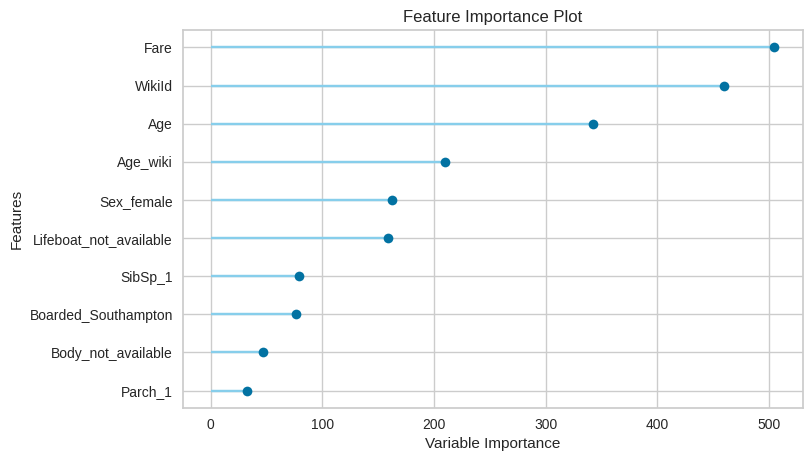

In [ ]:
%matplotlib inline
plot_model(model, 'feature')

     |████████████████████████████████| 564 kB 5.1 MB/s 


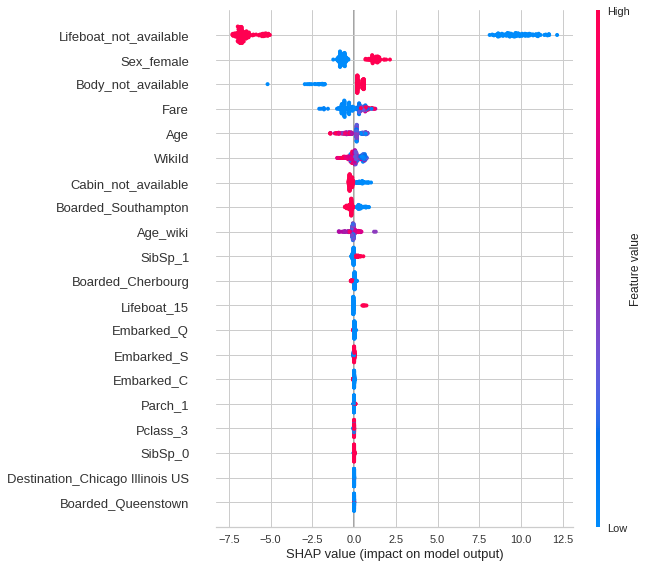

In [ ]:
!pip install shap
interpret_model(model)

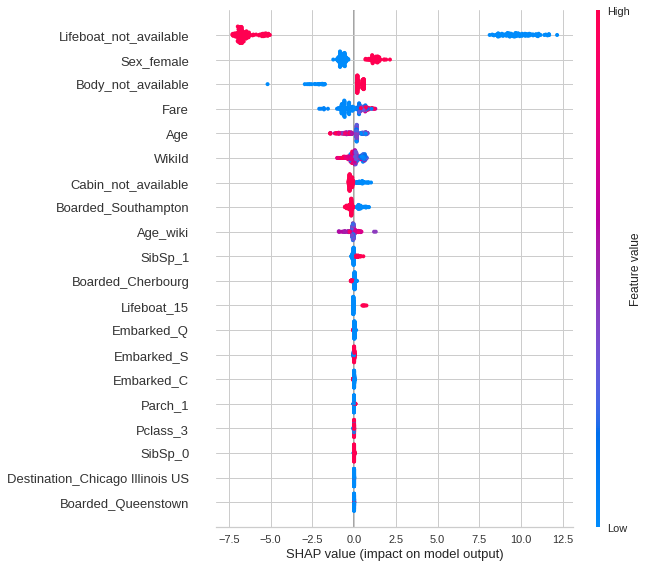

In [ ]:
interpret_model(model)

In [ ]:
# submission.to_csv('/content/drive/MyDrive/교육/DB/DB_CNA6_실습파일/car_insurance/prediction_pycaret_001.csv', index=False)



In [ ]:
##teachable machine  이미지를 분석?
#https://teachablemachine.withgoogle.com/

In [ ]:
# 참고할만함 https://velog.io/@devseunggwan/Machine-Learning-pycaret%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%B6%84%EC%84%9D

In [ ]:
# 이밎처리 참고 https://datascienceschool.net/03%20machine%20learning/03.02.01%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EC%B4%88.html
# 이밎참조 https://cinema4dr12.tistory.com/1258
#파이썬 이미지 픽셀값 추출
#https://blog.naver.com/PostView.naver?blogId=roootwoo&logNo=221591395501&categoryNo=43&parentCategoryNo=0&viewDate=&currentPage=3&postListTopCurrentPage=1&from=postList&userTopListOpen=true&userTopListCount=5&userTopListManageOpen=false&userTopListCurrentPage=3

In [ ]:
#https://minisp.tistory.com/4
#https://blog.naver.com/nswve/221320208139